In [ ]:
!pip install opencv-python


# New Section

In [ ]:
!pip install matplotlib


In [ ]:
!pip install numpy


In [ ]:
!pip install torch==1.7.1+cpu torchvision==0.8.2+cpu torchaudio===0.7.2 -f https://download.pytorch.org/whl/torch_stable.html


Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |████████████████████████████████| 159.4 MB 28 kB/s 
     |████████████████████████████████| 11.8 MB 234 kB/s 
     |████████████████████████████████| 7.6 MB 7.6 MB/s 
  Attempting uninstall: torch
    Found existing installation: torch 1.9.0+cu102
    Uninstalling torch-1.9.0+cu102:
      Successfully uninstalled torch-1.9.0+cu102
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.10.0+cu102
    Uninstalling torchvision-0.10.0+cu102:
      Successfully uninstalled torchvision-0.10.0+cu102
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchtext 0.10.0 requires torch==1.9.0, but you have torch 1.7.1+cpu which is incompatible.


In [ ]:
!pip install easyocr

     |████████████████████████████████| 63.6 MB 49 kB/s 
     |████████████████████████████████| 37.1 MB 53 kB/s 


In [ ]:
import cv2
import numpy as np
import easyocr
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
im_1_path = '/content/WhatsApp Image 2021-10-03 at 11.29.59.jpeg'

In [ ]:
def recognize_text(img_path):
    '''loads an image and recognizes text.'''
    
    reader = easyocr.Reader(['en'])
    return reader.readtext(img_path)

In [ ]:
result = recognize_text(im_1_path)
result

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[([[445, 146], [744, 146], [744, 175], [445, 175]],
  'GENERATORS INSTALLED AT EMAAR CORAL Tower DHA',
  0.5669329959530025),
 ([[116, 160], [450, 160], [450, 187], [116, 187]],
  'DAILY CHECK LiST FOR OPERATION AND MAINTENANCE OF DIESEL',
  0.8048032575067119),
 ([[343, 178], [516, 178], [516, 210], [343, 210]],
  'MAYPHIL PERKINS',
  0.9043685522159381),
 ([[617, 185], [661, 185], [661, 201], [617, 201]],
  'DGlO2',
  0.13216959091451003),
 ([[670, 182], [717, 182], [717, 200], [670, 200]],
  '0.9402',
  0.7120661888103418),
 ([[727, 181], [771, 181], [771, 195], [727, 195]],
  'D.G40?',
  0.1160225855830412),
 ([[84, 210], [108, 210], [108, 218], [84, 218]],
  'Datc:',
  0.27882410595715834),
 ([[619, 211], [669, 211], [669, 225], [619, 225]],
  '10OO KVA',
  0.32344745794090835),
 ([[673, 209], [723, 209], [723, 223], [673, 223]],
  '1og0KVA',
  0.14104347106747447),
 ([[727, 207], [779, 207], [779, 221], [727, 221]],
  '0250 KuA',
  0.3925426221934929),
 ([[381, 210], [478, 210], 

In [ ]:
li=""
for i in result:
  print(i[1])
  #li.append(i[1])
  li+=" "+i[1]

sales@retaillix com
supportegrandpagus
com
example@yourdomain.com
supportegrillart.com
username@example_
com
info@murphysnaturals com
support@swimlinecorp.com
your@email.com
api-services-support@amazon.com
info@sanco-technologies com
joe@example com
cheryl_vion-hasenaur@andersonsi_
talentacquisition@andersonsinc com
investor_relations@andersonsinc C .=
anne_rex@andersonsinc com


In [ ]:
li

' "Don\'t develop friendship with the enemy of your friend; otherwise your friend will turn into an enemy Hazrat Ali= (Radi-Allahu anhu)'

In [ ]:
import re
my_str = li
my_new_string = re.sub('[^a-zA-Z0-9 \n\.]', '', my_str)
print (my_new_string)

 Dont develop friendship with the enemy of your friend otherwise your friend will turn into an enemy Hazrat Ali RadiAllahu anhu


In [ ]:
li.replace

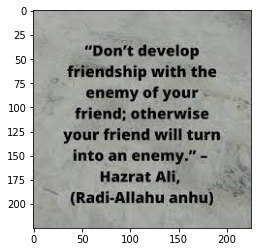

In [ ]:
img_1 = cv2.imread(im_1_path)
img_1 = cv2.cvtColor(img_1, cv2.COLOR_BGR2RGB)
plt.imshow(img_1)

In [ ]:
def overlay_ocr_text(img_path, save_name):
    '''loads an image, recognizes text, and overlays the text on the image.'''
    
    # loads image
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    dpi = 80
    fig_width, fig_height = int(img.shape[0]/dpi), int(img.shape[1]/dpi)
    plt.figure()
    f, axarr = plt.subplots(1,2, figsize=(fig_width, fig_height)) 
    axarr[0].imshow(img)
    
    # recognize text
    result = recognize_text(img_path)

    # if OCR prob is over 0.5, overlay bounding box and text
    for (bbox, text, prob) in result:
        if prob >= 0.5:
            # display 
            print(f'Detected text: {text} (Probability: {prob:.2f})')

            # get top-left and bottom-right bbox vertices
            (top_left, top_right, bottom_right, bottom_left) = bbox
            top_left = (int(top_left[0]), int(top_left[1]))
            bottom_right = (int(bottom_right[0]), int(bottom_right[1]))

            # create a rectangle for bbox display
            cv2.rectangle(img=img, pt1=top_left, pt2=bottom_right, color=(255, 0, 0), thickness=10)

            # put recognized text
            cv2.putText(img=img, text=text, org=(top_left[0], top_left[1] - 10), fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=1, color=(255, 0, 0), thickness=8)
        
    # show and save image
    axarr[1].imshow(img)
    plt.savefig(f'./output/{save_name}_overlay.jpg', bbox_inches='tight')

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


Detected text: "Don't develop (Probability: 0.99)
Detected text: friendship with the (Probability: 0.96)
Detected text: enemy of your (Probability: 0.93)
Detected text: friend; otherwise (Probability: 0.94)
Detected text: your friend will turn (Probability: 1.00)
Detected text: into an enemy (Probability: 0.99)
Detected text: (Radi-Allahu anhu) (Probability: 1.00)


FileNotFoundError: ignored

<Figure size 432x288 with 0 Axes>

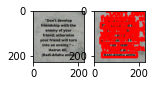

In [ ]:
overlay_ocr_text(im_1_path, '1_carplate')

In [ ]:
!pip install gTTS

In [ ]:
# Import the required module for text
# to speech conversion
from gtts import gTTS

# This module is imported so that we can
# play the converted audio
import os

# The text that you want to convert to audio
mytext = my_new_string

# Language in which you want to convert
language = 'en'

# Passing the text and language to the engine,
# here we have marked slow=False. Which tells
# the module that the converted audio should
# have a high speed
myobj = gTTS(text=mytext, lang=language, slow=False)

# Saving the converted audio in a mp3 file named
# welcome
myobj.save("wel.mp3")

# Playing the converted file
os.system("mpg321 wel.mp3")


32512